Decision Tree <br> <hr>
Problem Statement: <br><br>
Refer Telecom Churn Dataset. Apply appropriate EDA methods wherever required and perform feature engineering. Construct a model using a decision tree. Analyze the performance of the model with suitable evaluation measures
<br><hr>

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [112]:
df = pd.read_csv(r'D:\226514 dataset\ML A01\Telcom-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [113]:
df.shape

(7043, 21)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [115]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [116]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [117]:
df['TotalCharges'].fillna(value = 0, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(int)

In [118]:
df['MonthlyCharges'] = df['MonthlyCharges'].apply(np.int64)

df.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges       int64
TotalCharges         int32
Churn               object
dtype: object

In [119]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [120]:
df.duplicated().sum()

0

In [121]:
df = df.drop(['customerID'], axis = 1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29,29,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56,1889,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53,108,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1840,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70,151,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84,1990,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103,7362,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29,346,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74,306,Yes


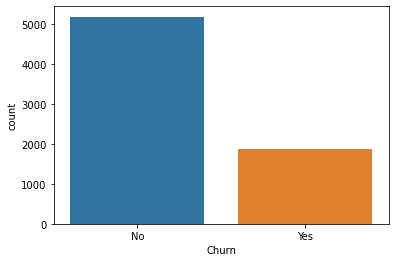

In [122]:
sns.countplot(x = 'Churn', data = df);

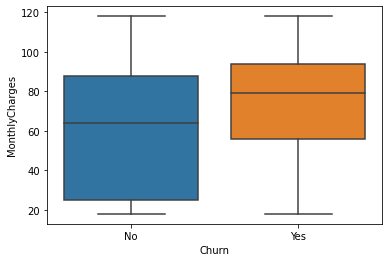

In [123]:
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = df);

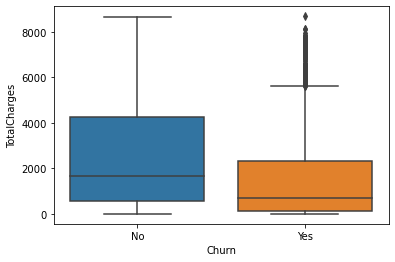

In [124]:
sns.boxplot(x = 'Churn', y = 'TotalCharges', data = df);

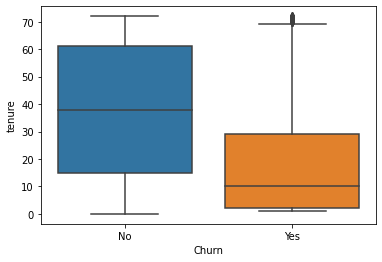

In [125]:
sns.boxplot(x = 'Churn', y = 'tenure', data = df);

In [126]:
#for col in df.select_dtypes(include = 'object'):
   # plt.figure(figsize = (8, 4))
   # sns.countplot(x = col, data = df)
   # plt.show()

In [127]:
#for col in df.select_dtypes(include = 'object'):
    #plt.figure(figsize = (8, 4))
   # sns.countplot(x = col, hue = 'Churn', data = df)
    #plt.show()

In [128]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.295897,2279.265086
std,0.368612,24.559481,30.092727,2266.790864
min,0.000000,0.000000,18.000000,0.000000
25%,0.000000,9.000000,35.000000,398.000000
50%,0.000000,29.000000,70.000000,1394.000000
75%,0.000000,55.000000,89.000000,3786.500000
max,1.000000,72.000000,118.000000,8684.000000


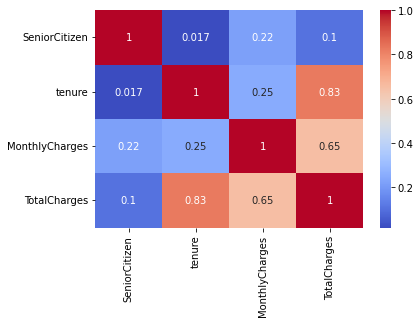

In [129]:
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

In [130]:
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
df_dummies = pd.get_dummies(df[cat_cols], drop_first = True)
df_final = pd.concat([df, df_dummies], axis = 1)
df_final.drop(cat_cols, axis = 1, inplace = True)

In [153]:
X = df_final.drop(['Churn'], axis = 1)
Y = df_final['Churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [154]:
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, Y_train)  

DecisionTreeClassifier()

In [155]:
Y_pred= classifier.predict(X_test)  

In [156]:
print(confusion_matrix(Y_test, Y_pred)  )

[[861 175]
 [203 170]]


The result is telling us that we have 861+170=1031 correct predictions and 175+203=378 incorrect predictions.

In [157]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

          No       0.81      0.83      0.82      1036
         Yes       0.49      0.46      0.47       373

    accuracy                           0.73      1409
   macro avg       0.65      0.64      0.65      1409
weighted avg       0.73      0.73      0.73      1409



The accuracy is 0.73 of this model